In [1]:
a="jai ganesh"
a

'jai ganesh'

## ConvXGB: Image Classififcation Using XGBOOST by extracting features using CNN

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [3]:
#from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
#import cv2

from sklearn.model_selection import train_test_split

In [5]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns

In [6]:
IMAGE_SIZE = 512
BATCH_SIZE = 32
CHANNELS=3

# Reading images from directory

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"stomach6000",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 6392 files belonging to 2 classes.


In [8]:
class_names = dataset.class_names
class_names

['NOTUM', 'TUM']

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 512, 512, 3)
[0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1]


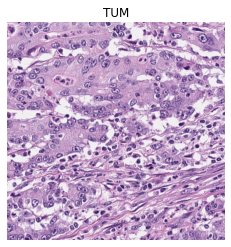

In [10]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

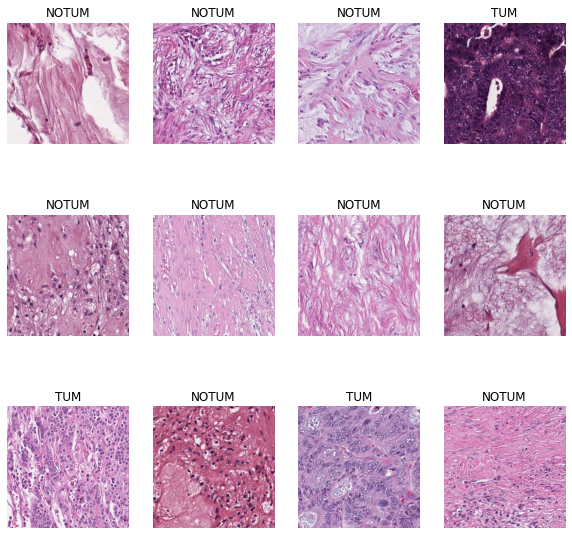

In [11]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
#DIRECTORY = r"/content/gdrive/MyDrive/stomachs/stomachs"
#CATEGORIES = ["NOTUM", "TUM"]

In [9]:
DIRECTORY = "C:/Users/91970/stomach6000"
CATEGORIES = ["NOTUM", "TUM"]

In [10]:
print("[INFO] loading images...")

data = []
labels = []
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(512, 512))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

[INFO] loading images...


In [11]:
set(labels)

{'NOTUM', 'TUM'}

In [12]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [13]:
labels.shape

(6392, 2)

In [ ]:
len(labels)

In [19]:
labels.shape[0]

2969

In [20]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [21]:
labels.shape

(2969, 2)

In [22]:
first_tuple_elements = [a_tuple[0] for a_tuple in labels]
print(first_tuple_elements)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [23]:
first_tuple_elements = np.array(first_tuple_elements)

### Spliting Data into Train and Test

In [24]:
(trainX, testX, trainY, testY) = train_test_split(data, first_tuple_elements,
	test_size=0.20, stratify=labels, random_state=42)

In [25]:
len(trainX),len(testX),len(trainY),len(testY)

(2375, 594, 2375, 594)

In [26]:
trainX.shape

(2375, 512, 512, 3)

In [27]:
testX.shape

(594, 512, 512, 3)

In [28]:
trainY.shape

(2375,)

In [29]:
testY.shape

(594,)

### Preprocessing: scale images

In [30]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

## Build convolutional neural network and train it

In [31]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

cnn_model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten()
   
    
    #layers.Dense(64, activation='relu'),
    #layers.Dense(n_classes, activation='softmax'),
])

cnn_model.build(input_shape=input_shape)

In [33]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 512, 512, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 510, 510, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 255, 255, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 253, 253, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 126, 126, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 124, 124, 64)       

In [34]:
cnn_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

### Here features are extracted (class labels) from the trained CNN model  through feature learning in the convolutional layers of the previous part.

In [35]:
#Now, let us use features from convolutional network

X_training_features=cnn_model.predict(trainX)


In [36]:
X_training_features.shape

(2375, 2304)

In [37]:
#Send test data through same feature extractor process

X_test_features = cnn_model.predict(testX)

In [38]:
X_test_features.shape

(594, 2304)

## The main task in this layer is to predict the class using XGBoost.

In [39]:
#XGBOOST

import xgboost as xgb
model = xgb.XGBClassifier()


### Passing X_training_features extracted from the CNN_model to XGBoost fit method for training

In [40]:
eval_set1 = [(X_training_features, trainY), (X_test_features, testY)]
eval_set = [ X_test_features, testY]


model.fit(X_training_features, trainY, eval_metric=["error", "logloss", "rmse", "mae"], eval_set=eval_set1, verbose=False)



C:\Users\91970\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [41]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [42]:
#Print overall accuracy Test 
from sklearn import metrics
#Now predict using the trained RF model. 
prediction_test= model.predict(X_test_features)
#Now predict using the trained RF model. 
prediction_train = model.predict(X_training_features)

print ("NO. of Training Samples = " , len(X_training_features) ,"Accuracy Train = ", metrics.accuracy_score(prediction_train , trainY))
print ("NO. of Test Samples = " , len(X_test_features) , "Accuracy Test = ", metrics.accuracy_score(prediction_test , testY))

dic = {'NO. of Training Samples' : [len(X_training_features)],
       'Accuracy Train'         : [metrics.accuracy_score(prediction_train, trainY)],
       'NO. of Test Samples' : [len(X_test_features)],
       'Accuracy Test'         : [metrics.accuracy_score(prediction_test, testY)]}
      
                                  
df = pd.DataFrame(dic)    
df                                 


NO. of Training Samples =  2375 Accuracy Train =  1.0
NO. of Test Samples =  594 Accuracy Test =  0.9326599326599326


,NO. of Training Samples,Accuracy Train,NO. of Test Samples,Accuracy Test
0,2375,1.0,594,0.93266


In [43]:
from sklearn.metrics import confusion_matrix , classification_report


In [44]:
print('*************** Evaluation on Test Data ***************')
print('Accuracy Score: ', metrics.accuracy_score(prediction_test, testY))
print(classification_report(testY, prediction_test))
print('--------------------------------------------------------')
print("")
print('*************** Evaluation on Training Data ***************')
print('Accuracy Score: ', metrics.accuracy_score(prediction_train, trainY))
print(classification_report(trainY, prediction_train))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9326599326599326
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       310
         1.0       0.95      0.91      0.93       284

    accuracy                           0.93       594
   macro avg       0.93      0.93      0.93       594
weighted avg       0.93      0.93      0.93       594

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1238
         1.0       1.00      1.00      1.00      1137

    accuracy                           1.00      2375
   macro avg       1.00      1.00      1.00      2375
weighted avg       1.00      1.00      1.00      2375

--------------------------------------------------------



### Confusion Matrix

<AxesSubplot:>

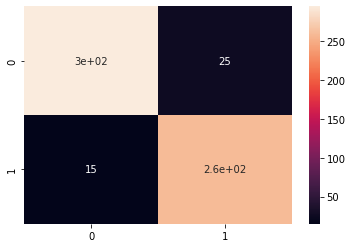

In [46]:
cm = confusion_matrix(prediction_test, testY)
#print(cm)
sns.heatmap(cm, annot=True)

In [47]:
accuracy = accuracy_score(testY, prediction_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

results = model.evals_result()
print(results)
results['validation_0']['error']
epochs = len(results["validation_0"]["error"])
x_axis = range(0, epochs)

Accuracy: 93.27%
{'validation_0': OrderedDict([('error', [0.054737, 0.035368, 0.021053, 0.018947, 0.012632, 0.008842, 0.005895, 0.003789, 0.002105, 0.001263, 0.000421, 0.000421, 0.000421, 0.000421, 0.000421, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), ('logloss', [0.489208, 0.365502, 0.282412, 0.222548, 0.177554, 0.144835, 0.118287, 0.097051, 0.081395, 0.068566, 0.057824, 0.049974, 0.043255, 0.037592, 0.032886, 0.029113, 0.025929, 0.023023, 0.020847, 0.018774, 0.017003, 0.015582, 0.014303, 0.013223, 0.012301, 0.011529, 0.0108, 0.0101, 0.009485, 0.008918, 0.008456, 0.008066, 0.007663, 0.007325, 0.00699, 0.00665

In [48]:
print(results['validation_0']['logloss'])

[0.489208, 0.365502, 0.282412, 0.222548, 0.177554, 0.144835, 0.118287, 0.097051, 0.081395, 0.068566, 0.057824, 0.049974, 0.043255, 0.037592, 0.032886, 0.029113, 0.025929, 0.023023, 0.020847, 0.018774, 0.017003, 0.015582, 0.014303, 0.013223, 0.012301, 0.011529, 0.0108, 0.0101, 0.009485, 0.008918, 0.008456, 0.008066, 0.007663, 0.007325, 0.00699, 0.006658, 0.006355, 0.00608, 0.005841, 0.005639, 0.005446, 0.005286, 0.005109, 0.004948, 0.00481, 0.004683, 0.004548, 0.004406, 0.004303, 0.004208, 0.004099, 0.004004, 0.00392, 0.003833, 0.003751, 0.003663, 0.003577, 0.003509, 0.003434, 0.003381, 0.003318, 0.003233, 0.003172, 0.003112, 0.003061, 0.003018, 0.002967, 0.002915, 0.002864, 0.002816, 0.002774, 0.002735, 0.002695, 0.002652, 0.002616, 0.002584, 0.00254, 0.002504, 0.002473, 0.002446, 0.002415, 0.002383, 0.002364, 0.002331, 0.002306, 0.002279, 0.002256, 0.002228, 0.002207, 0.002179, 0.002159, 0.002136, 0.002123, 0.002101, 0.002077, 0.002061, 0.002042, 0.002027, 0.002006, 0.00199]


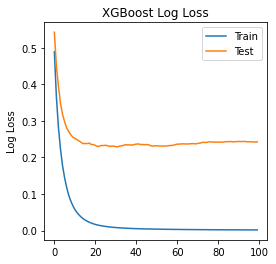

In [49]:
# plot log loss
fig, ax = pyplot.subplots(figsize=(4,4))
ax.plot(x_axis, results["validation_0"]["logloss"], label="Train")
ax.plot(x_axis, results["validation_1"]["logloss"], label="Test")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.title("XGBoost Log Loss")
pyplot.show()

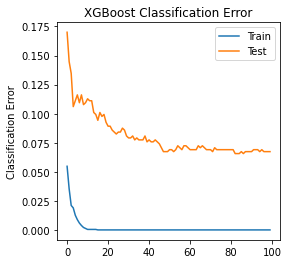

In [50]:
# plot classification error
fig, ax = pyplot.subplots(figsize=(4,4))
ax.plot(x_axis, results["validation_0"]["error"], label="Train")
ax.plot(x_axis, results["validation_1"]["error"], label="Test")
ax.legend()
pyplot.ylabel("Classification Error")
pyplot.title("XGBoost Classification Error")
pyplot.show()

In [51]:
data_dmatrix = xgb.DMatrix(data=X_training_features,label=testY)

### k-fold Cross Validation using XGBoost

In [52]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="error", as_pandas=True, seed=123)

[20:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
cv_results.head()

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.216,0.00619,0.216,0.012372


### Hyper Parameter Optimization

In [58]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [59]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [60]:
classifier=xgb.XGBClassifier()

In [61]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [62]:
random_search.fit(X_training_features, trainY)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   34.5s finished
C:\Users\ammananna\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [63]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [64]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [65]:
from numpy import nan

In [66]:
classifier=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [67]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_training_features, trainY,cv=10)

C:\Users\ammananna\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [68]:
score

array([0.7826087 , 0.95652174, 0.91304348, 0.82608696, 0.91304348,
       0.7826087 , 0.7826087 , 0.95652174, 0.82608696, 0.65217391])

In [69]:
score.mean()

0.8391304347826087

### Passing X_training_features extracted from the CNN_model to SVC fit method for training

In [54]:
from sklearn.svm import SVC
model_svc = SVC()

In [55]:
model_svc.fit(X_training_features, trainY)

SVC()

In [56]:
model_svc.score(X_test_features, testY)

0.8888888888888888

In [ ]:
#compare results of both classifers(XGBoost & SVC). Here both models(XGBoost & SVC) getting features from the trainined CNN Model. 